In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score



# Home Assignment 1 - Regression and Classification Models

Aim:

    Students should provide the best possible regression and classification models using Decision Trees and Linear models
    Models should examine different hyperparameters and select the best one [Remember: everything else being similar, the simplest models should be prefered]
    It is expected a full testing and validation cycle of model selection and evaluation

Objective 1

    Produce the best regression model for critical_temp (Dependent Variable)

Objective 2

    Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases


#### 0.1. Data Preparation

In [14]:
# Load data
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")

In [15]:
# Check data
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,52.0
1,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,50.0
2,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,41.5
3,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,32.0
4,-2.1737,-1.5994,-0.9850,-1.0041,-0.5006,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,-0.9684,-1.0090,-0.8995,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,29.0


In [16]:
# Check if any column has a missing value overall (not per row)
print(df.isnull().values.any())

False


**Note to self:** 
To scale or not to scale -  Algorithms that Don't Require Scaling:

    Tree-Based Algorithms: Decision trees, random forests, and gradient boosting algorithms (e.g., XGBoost) are not sensitive to feature scaling because they make decisions based on feature thresholds.
    Naive Bayes: Naive Bayes classifiers are not affected by feature scaling because they estimate class probabilities based on feature distributions.

#### 0.2: Data Splitting

In [17]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('critical_temp', axis=1), df['critical_temp'], test_size=0.2, random_state=42)

### **Objective 1** - Produce the best regression model for critical_temp (Dependent Variable)

In [18]:
# Linear Regression
reg1 = LinearRegression().fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)


In [19]:
# Ridge Regression
reg2 = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)

In [20]:
# Lasso Regression
reg3 = Lasso(alpha=1.0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)

In [21]:
# Support Vector Regression
reg4 = svm.SVR().fit(X_train, y_train)
y_pred4 = reg4.predict(X_test)


In [22]:
# Random Forest Regression
reg5 = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
y_pred5 = reg5.predict(X_test)

In [23]:
# Gradient Boosting Regression
reg6 = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
y_pred6 = reg6.predict(X_test)


In [24]:
# Neural Network Regression
reg7 = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred7 = reg7.predict(X_test)

C:\Users\antun\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
# Create a table with the results
results = pd.DataFrame(columns=['MSE', 'MAE', 'R2'])
results.loc['Linear Regression'] = [mean_squared_error(y_test, y_pred1), mean_absolute_error(y_test, y_pred1), r2_score(y_test, y_pred1)]
results.loc['Ridge Regression'] = [mean_squared_error(y_test, y_pred2), mean_absolute_error(y_test, y_pred2), r2_score(y_test, y_pred2)]
results.loc['Lasso Regression'] = [mean_squared_error(y_test, y_pred3), mean_absolute_error(y_test, y_pred3), r2_score(y_test, y_pred3)]
results.loc['Support Vector Regression'] = [mean_squared_error(y_test, y_pred4), mean_absolute_error(y_test, y_pred4), r2_score(y_test, y_pred4)]
results.loc['Random Forest Regression'] = [mean_squared_error(y_test, y_pred5), mean_absolute_error(y_test, y_pred5), r2_score(y_test, y_pred5)]
results.loc['Gradient Boosting Regression'] = [mean_squared_error(y_test, y_pred6), mean_absolute_error(y_test, y_pred6), r2_score(y_test, y_pred6)]
results.loc['Neural Network Regression'] = [mean_squared_error(y_test, y_pred7), mean_absolute_error(y_test, y_pred7), r2_score(y_test, y_pred7)]
results


,MSE,MAE,R2
Linear Regression,317.878431,13.492478,0.734405
Ridge Regression,317.980736,13.486043,0.734319
Lasso Regression,421.978129,15.967022,0.647427
Support Vector Regression,270.104705,10.573369,0.774321
Random Forest Regression,399.752618,13.888240,0.665997
Gradient Boosting Regression,161.368736,8.587769,0.865172
Neural Network Regression,160.583260,8.263311,0.865829


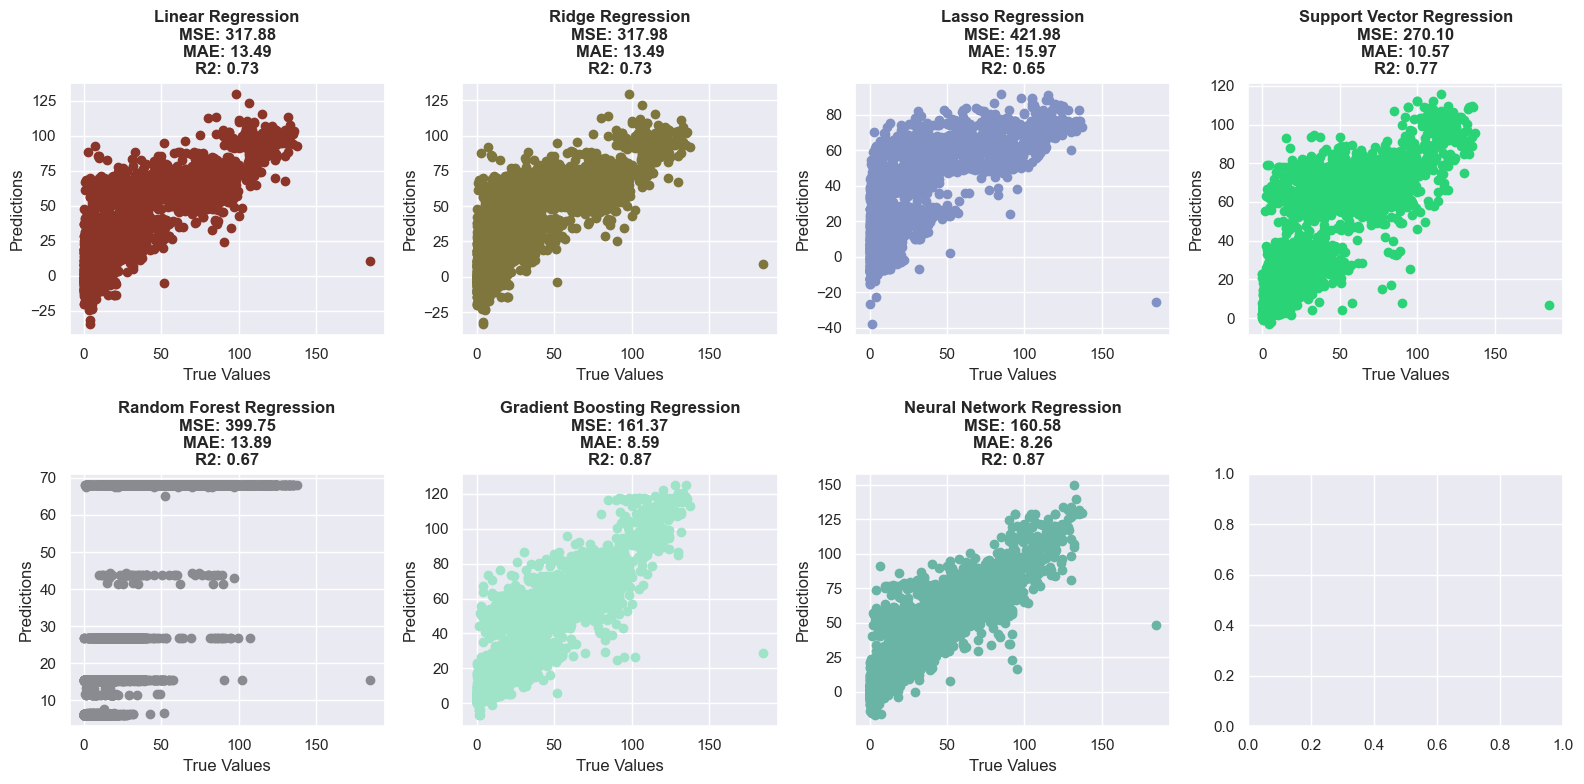

In [44]:
import matplotlib.pyplot as plt
import random

regressions = [
    ("Linear Regression", y_pred1),
    ("Ridge Regression", y_pred2),
    ("Lasso Regression", y_pred3),
    ("Support Vector Regression", y_pred4),
    ("Random Forest Regression", y_pred5),
    ("Gradient Boosting Regression", y_pred6),
    ("Neural Network Regression", y_pred7),
]

# Set the number of plots per line and per row
plots_per_line = 4
plots_per_row = 2
fig, axes = plt.subplots(plots_per_row, plots_per_line, figsize=(16, 8))  # Adjust figsize as needed

for i, (title, y_pred) in enumerate(regressions):
    row = i // plots_per_line
    col = i % plots_per_line
    ax = axes[row, col]
    
    # Generate a random color for each graphic
    color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    ax.scatter(y_test, y_pred, color=color)
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    
    # Make the title bold and include MSE, MAE, and R2
    mse, mae, r2 = results.loc[title]
    title_text = f'{title}\nMSE: {mse:.2f}\nMAE: {mae:.2f}\nR2: {r2:.2f}'
    ax.set_title(title_text, fontweight="bold")
    
plt.tight_layout()
plt.show()


### **Objective 2** - Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases